ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #2
 
1. Зашумить изображение при помощи шума гаусса, постоянного шума.
------------------------------------------------------------


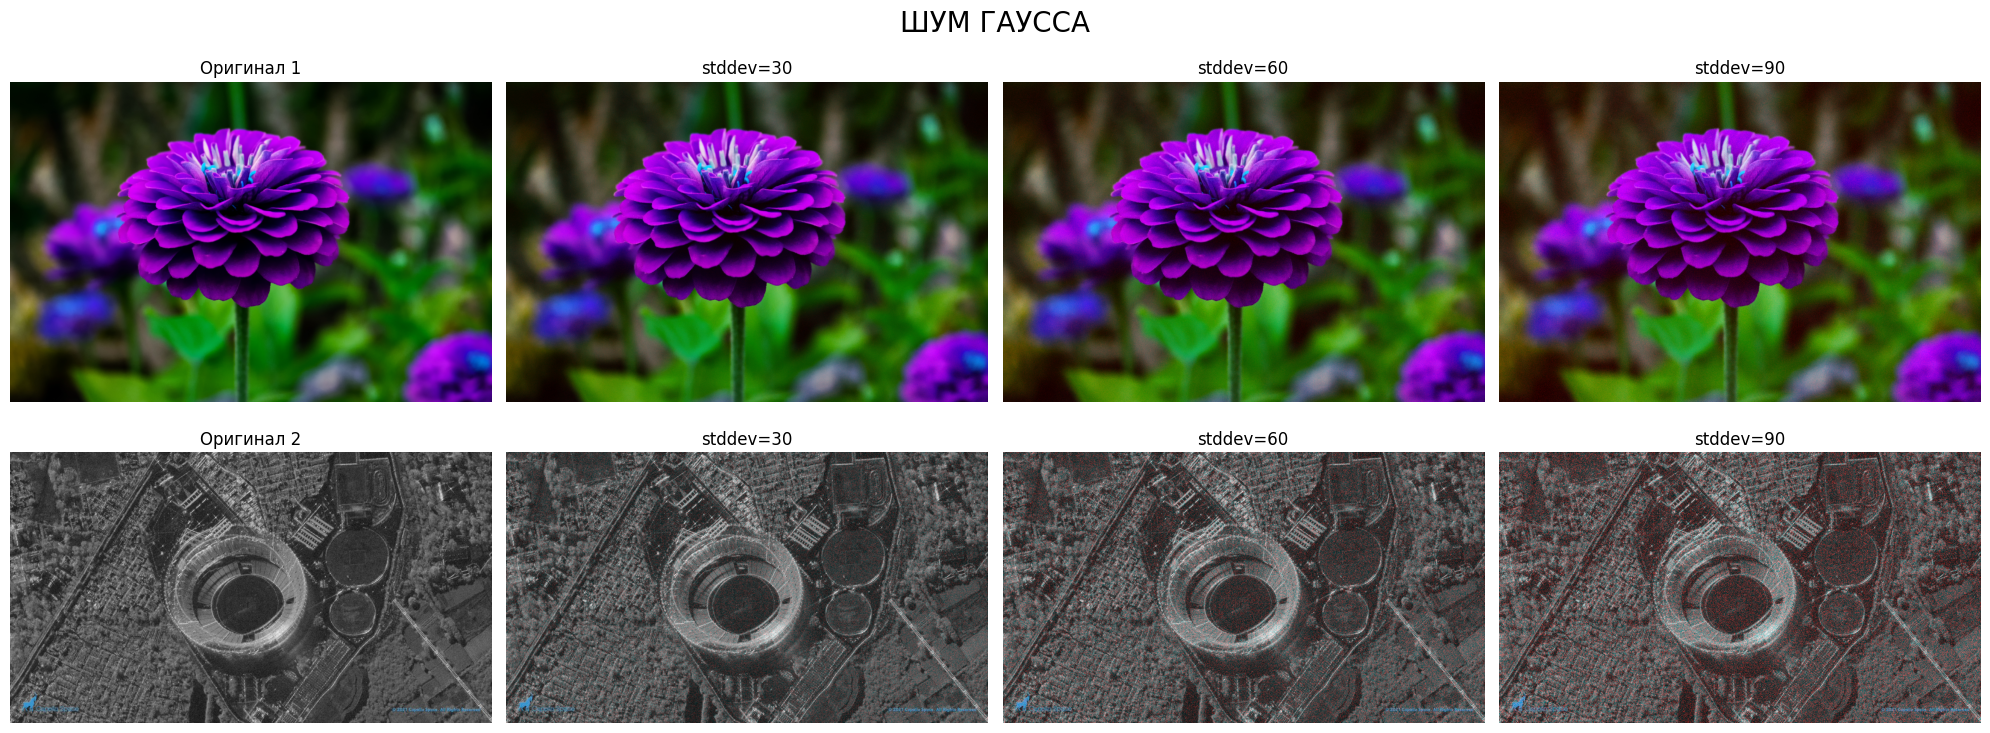

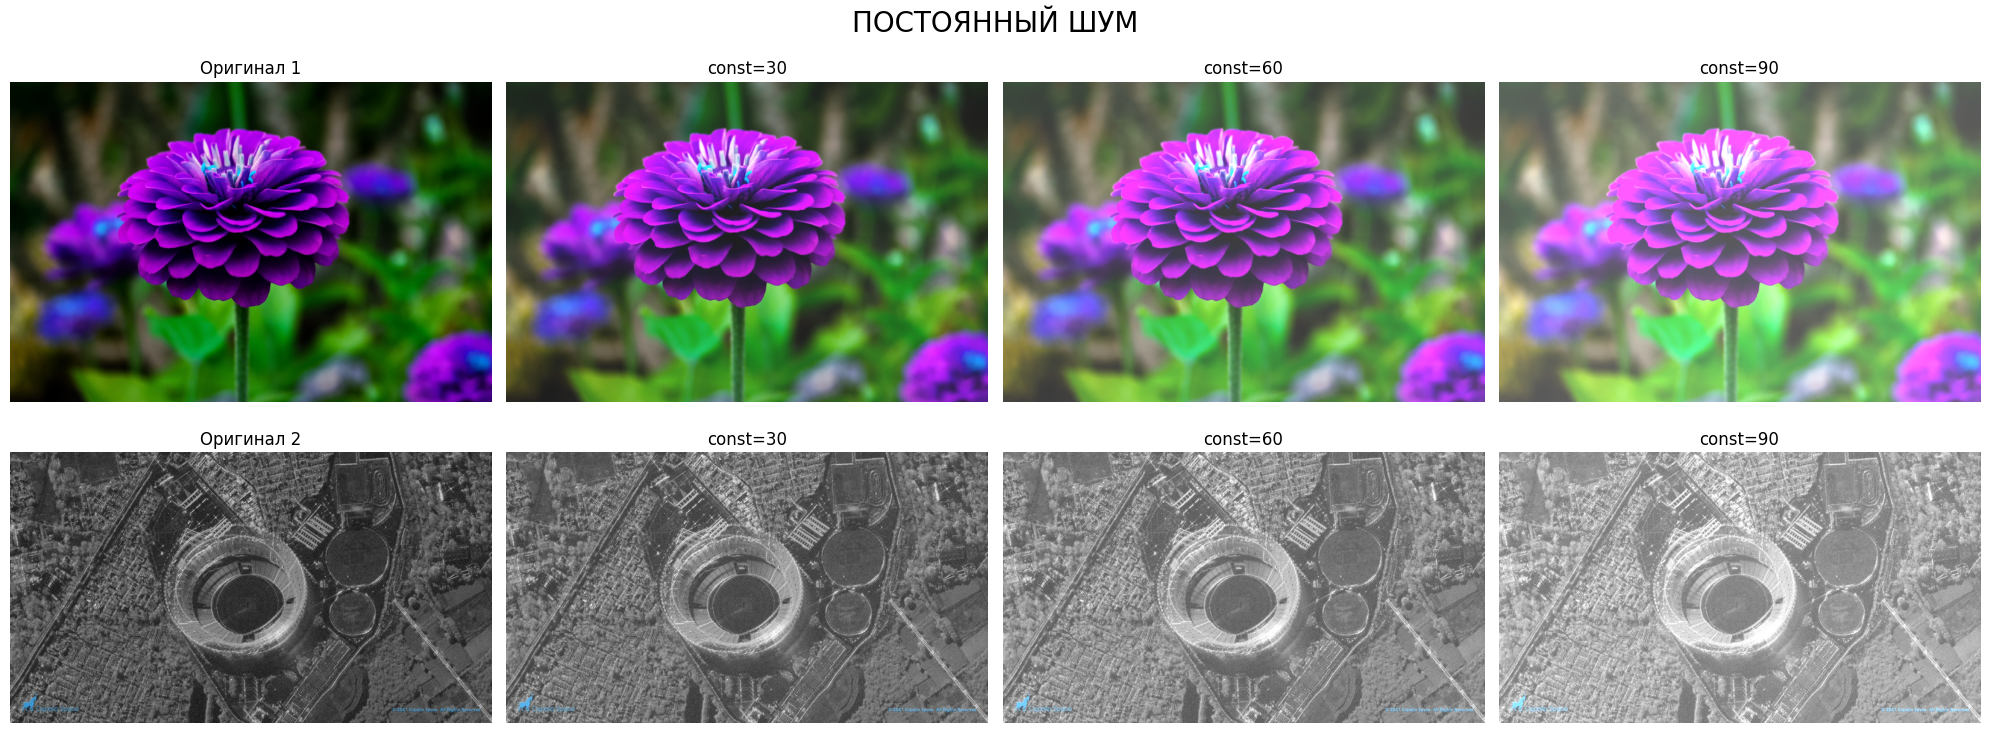

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity
import os

print("="*50)
print("ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #2")
print("="*50)
print(" ")
img = cv2.imread('img.jpg')
img_wb = cv2.imread('img_wb.jpg')


###1 ЗАДАНИЕ : Зашумить изображение при помощи шума гаусса, постоянного шума.
print("1. Зашумить изображение при помощи шума гаусса, постоянного шума.")
print("-"*60)

stddev = [30, 60, 90]
mean = 0

def gauss(x, mean, sigma):
    noise = np.zeros(x.shape, dtype=np.float32)
    cv2.randn(noise, mean, sigma)
    noisy_image = x.astype(np.float32) + noise     # Добавляем шум к исходному изображению
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

def constant(image, constant_value):
    noisy_image = image.astype(np.float32) + constant_value
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)


plt.figure(figsize=(20, 8))
# Оригиналы
plt.subplot(2, 4, 1)
plt.imshow(img)
plt.title("Оригинал 1")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(img_wb)
plt.title("Оригинал 2")
plt.axis("off")

for i in range(len(stddev)):
    # шум для img
    ng1 = gauss(img, mean, stddev[i])
    plt.subplot(2, 4, i+2)
    plt.imshow(ng1, cmap="gray")
    plt.title(f"stddev={stddev[i]}")
    plt.axis('off')

    # шум для img_wb
    ng2 = gauss(img_wb, mean, stddev[i])
    plt.subplot(2, 4, i+6)
    plt.imshow(ng2, cmap="gray")
    plt.title(f"stddev={stddev[i]}")
    plt.axis('off')

plt.suptitle("ШУМ ГАУССА", fontsize=20)
plt.tight_layout()
plt.show()
print(" ")


plt.figure(figsize=(20, 8))
# Оригиналы
plt.subplot(2, 4, 1)
plt.imshow(img)
plt.title("Оригинал 1")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(img_wb)
plt.title("Оригинал 2")
plt.axis("off")

for i in range(len(stddev)):
    # постоянный шум для img
    ng1 = constant(img, stddev[i])
    plt.subplot(2, 4, i+2)
    plt.imshow(ng1)
    plt.title(f"const={stddev[i]}")
    plt.axis('off')

    # постоянный шум для img_wb
    ng2 = constant(img_wb, stddev[i])
    plt.subplot(2, 4, i+6)
    plt.imshow(ng2, cmap="gray")
    plt.title(f"const={stddev[i]}")
    plt.axis('off')

plt.suptitle("ПОСТОЯННЫЙ ШУМ", fontsize=20)
plt.tight_layout()
plt.show()
print(" ")



